**Projeto Perseu - análise de solicitação de matricula**

- Media de todas as disciplinas

- Maior nota

- Menor nota

- Quantidade de disciplinas

- Carga horaria total

- Quantidade de aprovação e reprovação

- Quantos anos entrou na ufrn



Importando bibliotecas


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Leitura de CSV

In [0]:
table = pd.read_csv("https://raw.githubusercontent.com/repitta/CienciaDeDadosEducacionais/master/dadosUFRN/dados%20tratados%20ufrn/disciplinasECT201520191.csv")
table.drop(columns=["Unnamed: 0"], inplace=True)

In [0]:
table.sample(10)

,matricula,media,min,max,QuantDisciCursadas,quantAprovado,quantReprovado,carga_total,disciplina,situacao,carga_total_atual,QuantDisciAtual,AnosMatriculado,vezesReprovado
42044,20160142835,3.220000,0.6,6.3,5,2,3,330,ECT2412,REPROVADO,330,5,2,0
24369,2015091678,4.314286,1.5,6.4,7,4,3,375,ECT2411,APROVADO,315,5,2,0
34185,20170032176,4.650000,1.2,7.0,6,4,2,330,ECT2306,APROVADO,345,7,0,0
36812,20150126533,4.020000,1.3,5.5,5,3,2,330,ECT2401,REPROVADO,315,5,3,0
45740,20180035190,4.760000,2.1,5.7,5,4,1,255,ECT2305,APROVADO,255,5,0,0
48965,20170045218,6.883333,6.2,7.7,6,6,0,300,ECT2402,REPROVADO,270,5,2,0
1966,2013073160,7.166667,5.5,9.8,6,6,0,300,ECT2413,APROVADO,300,5,2,1
12049,2015017053,7.657143,6.1,8.8,7,7,0,345,ECT2303,APROVADO,360,6,1,1
8764,2013090500,6.540000,5.2,9.3,5,5,0,330,ECT2401,APROVADO,375,6,3,1
49339,20170117907,6.633333,5.7,8.3,6,6,0,330,ECT2401,APROVADO,345,6,2,0


Quantos alunos aprovados e reprovados

In [0]:
table.situacao.value_counts()

Percentual de alunos que reprovaram 

In [0]:
7806*100/24949

In [0]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24949 entries, 0 to 24948
Data columns (total 13 columns):
matricula             24949 non-null int64
media                 24949 non-null float64
min                   24949 non-null float64
max                   24949 non-null float64
QuantDisciCursadas    24949 non-null int64
quantAprovado         24949 non-null int64
quantReprovado        24949 non-null int64
carga_total           24949 non-null int64
anoAnterior           24949 non-null float64
AnoIngresso           24949 non-null float64
AnosMatriculado       24949 non-null int64
disciplina            24949 non-null object
situacao              24949 non-null object
dtypes: float64(5), int64(6), object(2)
memory usage: 2.5+ MB


Estatísticas dos aprovados

In [0]:
table.loc[table["situacao"]=="APROVADO"].describe()

Estatísticas dos reprovados

In [0]:
table.loc[table["situacao"]=="REPROVADO"].describe()

Aluno que passou com média 10 no semestre anterior e reprovou em uma matéria no atual

In [0]:
table.loc[(table["situacao"]=="REPROVADO") & ( table["min"]==10)]

Selecionando apenas quem cursou Lógica de Programação no semestre posterior (atual)

In [0]:
tableLOP = table.loc[(table["disciplina"]=="ECT2203")]

Aprovados e reprovados em LOP

In [0]:
tableLOP.situacao.value_counts()

Porcentagem de reprovados

In [0]:
561*100/(990+561)

Descrição dos aprovados em LOP

In [0]:
tableLOP.loc[tableLOP["situacao"]=="APROVADO"].describe()

Descrição dos reprovados em LOP

In [0]:
tableLOP.loc[tableLOP["situacao"]=="REPROVADO"].describe()

Criando um novo campo númerico que represente aprovados e reprovados

In [0]:
table["situ"] = 1
table.loc[table["situacao"].str.contains("RE"),"situ"]=0

In [0]:
table["situ"].unique()

array([1, 0])

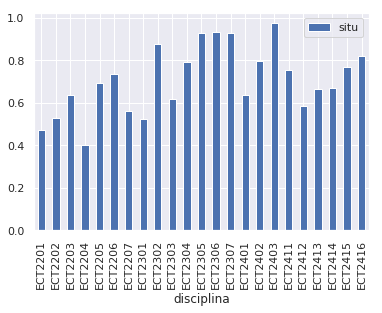

In [0]:
sns.set()
disc_pivot = table.pivot_table(index="disciplina",values="situ")
disc_pivot.plot.bar()
plt.show()

In [0]:
disciplina_pivot = table.pivot_table(index="disciplina",values="situacao")
disciplina_pivot.plot.bar()
plt.show()

In [0]:
x = sns.FacetGrid(table,col="disciplina",size=4,aspect=1.1,col_wrap=4)
x = (x.map(plt.bar,"situacao","situ").add_legend())

In [0]:
x = sns.FacetGrid(table,col="disciplina",margin_titles=False,size=4,aspect=1.1,col_wrap=4)
x = (x.map(plt.hist,"situacao",color="orange").add_legend())

#SVM

In [0]:
tableLOP.head(1)

Correlações

In [0]:
tableLOP.corr()

In [0]:
X = tableLOP.iloc[:,[1,2,3,4,5,6,7,10]].values #resto dos dados
y = tableLOP.iloc[:,-1].values#alvo

Separando treino e teste

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 11)

Normalizando

In [0]:
sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Modelando a SVM

In [0]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

#classifier = SVC(kernel = 'linear', random_state = 0)
classifier = Pipeline((
                      ("scaler", StandardScaler()),
                       ("svm_clf", SVC(kernel="rbf", gamma=0.5, C=0.9))
))
classifier.fit(X_train, y_train)

Predizendo

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

print(y_test[0:75])
print(y_pred[0:75])

Matriz de confusão

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

Acurácia do modelo

In [0]:
from sklearn.metrics import accuracy_score
print("LinearSVC accuracy : ",accuracy_score(y_test, y_pred, normalize = True))

In [0]:
classifier.accuracy_score(y_test, y_pred)

In [0]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
#plt.xlabel('Age')
#plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(X_train, y_train).predict(X_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(y_test, pred, normalize = True))

In [0]:
cm = confusion_matrix(y_test, y_pred)
cm

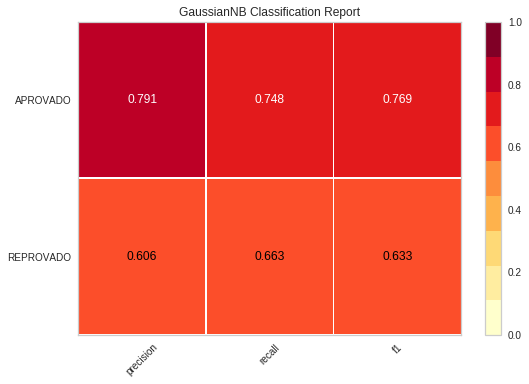

In [0]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=["REPROVADO", "APROVADO"])
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data